# PRACA DOMOWA 2

Plik *data.csv* zawiera dane medyczne Indian z plemienia Pima. Ostatnia kolumna (*Outcome*) binarną zmienną odpowiedzi, gdzie 1 oznacza, że dana osoba ma cukrzyce.

In [391]:
import pandas as pd
import numpy as np
import sklearn

data = pd.read_csv("data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50.0,1
1,1,85,NaN,29,0,NaN,0.351,31.0,0
2,8,183,64.0,0,0,NaN,0.672,NaN,1
3,1,89,66.0,23,94,NaN,0.167,NaN,0
4,0,137,NaN,35,168,43.1,2.288,33.0,1


### Zadanie 0 Podziel zbiór na testowy i treningowy w proporcjach 0.3 / 0.7

In [392]:
train_mask = np.random.rand(len(data)) < 0.7
df_train = data[train_mask]
df_test = data[~train_mask]

## 1. Preprocessing

Wczytany zbiór danych posiada braki danych. Większość klasyfikatorów, w tym drzewa decyzyjne (ale lasy losowe już niekoniecznie :)), nie jest w stanie operować na tak wybrakowanych danych.

### Zadanie 1.1


Wypełnij brakujące dane  
a) średnią  
b) medianą  
c) modą   
+d) przy pomocy metody Multivariate feature imputation z biblioteki *sklearn*  

Wyświetl 5 pierwszych wierszy przy pomocy metody *.head()*

In [393]:
#a)

df_train_mean = df_train.fillna(df_train.mean())
df_test_mean = df_test.fillna(df_train.mean())
df_train_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,0,33.600000,0.627,50.000000,1
1,1,85,69.363636,29,0,31.137091,0.351,31.000000,0
2,8,183,64.000000,0,0,31.137091,0.672,34.091873,1
3,1,89,66.000000,23,94,31.137091,0.167,34.091873,0
4,0,137,69.363636,35,168,43.100000,2.288,33.000000,1


In [394]:
#b)

df_train_med = df_train.fillna(df_train.median())
df_test_med = df_test.fillna(df_train.median())
df_train_med.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50.0,1
1,1,85,72.0,29,0,31.6,0.351,31.0,0
2,8,183,64.0,0,0,31.6,0.672,31.0,1
3,1,89,66.0,23,94,31.6,0.167,31.0,0
4,0,137,72.0,35,168,43.1,2.288,33.0,1


In [395]:
#c)

df_train_mod = df_train.fillna(df_train.mode().iloc[0])
df_test_mod = df_test.fillna(df_train.mode().iloc[0])
df_train_mod.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50.0,1
1,1,85,80.0,29,0,32.0,0.351,31.0,0
2,8,183,64.0,0,0,32.0,0.672,22.0,1
3,1,89,66.0,23,94,32.0,0.167,22.0,0
4,0,137,80.0,35,168,43.1,2.288,33.0,1


In [396]:
#d)
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_train)

df_train_imp = pd.DataFrame(imp.transform(df_train))
df_train_imp.columns = data.columns
df_test_imp = pd.DataFrame(imp.transform(df_test))
df_test_imp.columns = data.columns
df_imp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,0.0,33.600000,0.627,50.000000,1.0
1,1.0,85.0,75.920580,29.0,0.0,29.648081,0.351,31.000000,0.0
2,8.0,183.0,64.000000,0.0,0.0,30.300639,0.672,46.894426,1.0
3,1.0,89.0,66.000000,23.0,94.0,29.243195,0.167,25.057815,0.0
4,0.0,137.0,96.412381,35.0,168.0,43.100000,2.288,33.000000,1.0


## Ocena jakości modelu

### Zadanie 2.1

Podziel zbior na testowy i treningowy. Wytrenuj drzewo decyzyjne na zbiorze z punktu a) zadania 1.1 (ustaw wartość 'max_depth' równą 5). Wyrysuj otrzymane drzewo korzystając z kodu w następnej komórce podstawiając swoje zmienne. 

In [397]:
from sklearn import tree

X_train = df_train_mean[data.columns[:-1]]
y_train = df_train_mean[data.columns[-1]]
X_test = df_test_mean[data.columns[:-1]]
y_test = df_test_mean[data.columns[-1]]

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)


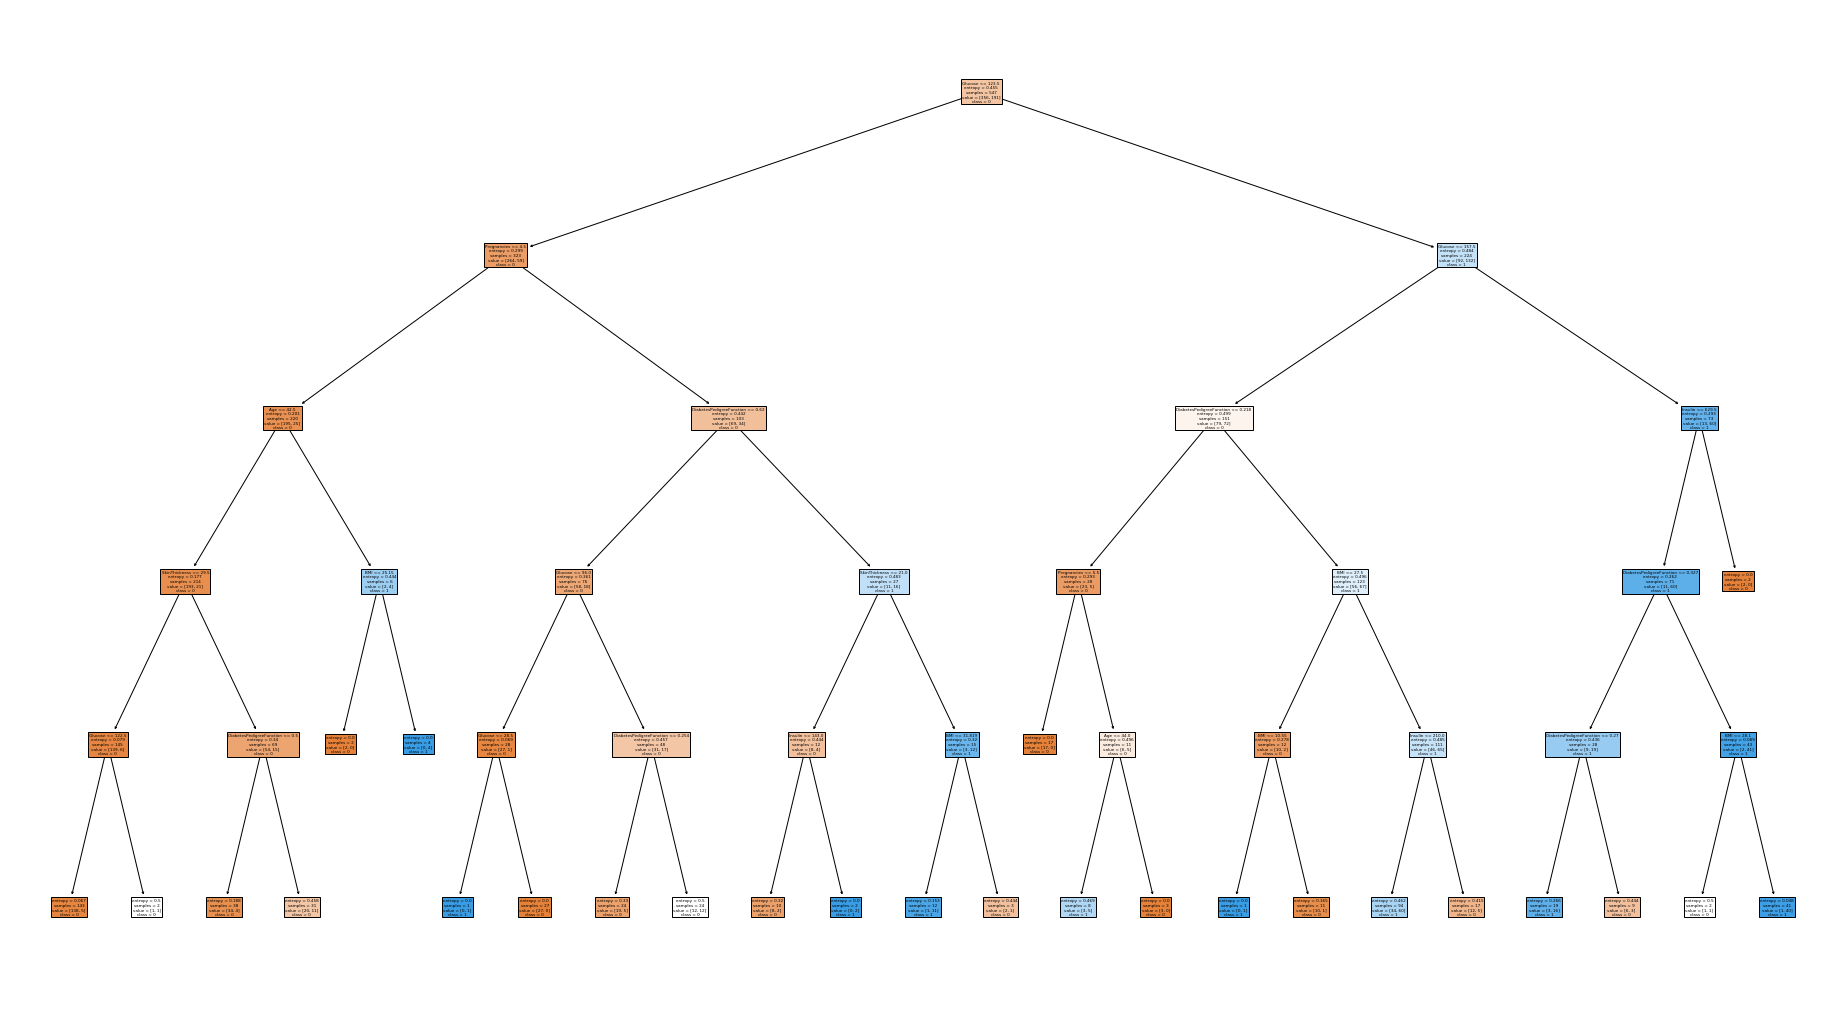

In [398]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 18))
tree.plot_tree(clf, filled=True, feature_names=df_train_med.columns, class_names=("0", "1"))
plt.show()

### Zadanie 2.2

Dla stworzonego drzewa oblicz  
a) Accuracy  
b) Error Rate  
c) Precision, Recall (True Positive Rate)
d) False Positive Rate


Wyrzuc ze zbioru testowego 90% wierszy z klasą 1. Porównaj Recall z Accuracy.  

Czy Accuracy jest dobrą metryką dla niezrównoważonych danych?  
Która z tych metryk jest najważniejsza w przypadku przewidywania czy dana osoba jest chora?

In [399]:
y_pred = clf.predict(X_test)

accuracy = sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.3f}")

error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.3f}")

precision = sum((y_pred == 1) & (y_pred == y_test)) / sum(y_pred)
recall = sum((y_pred == 1) & (y_pred == y_test)) / sum(y_test)
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")

fpr = 1 - recall
print(f"False Positive Rate: {fpr:.3f}")


#dla obciętego zbioru
test_0_idx = y_test == 0
test_1_idx = y_test == 1
trim_mask = np.random.rand(sum(test_1_idx)) < 0.3

X_test_trimmed = pd.concat([X_test[test_0_idx], (X_test[test_1_idx][trim_mask])])
y_test_trimmed = pd.concat([y_test[test_0_idx], (y_test[test_1_idx][trim_mask])])

y_pred_trimmed = clf.predict(X_test_trimmed)

accuracy_trimmed = sum(y_pred_trimmed == y_test_trimmed) / len(y_test_trimmed)
recall_trimmed = sum((y_pred_trimmed == 1) & (y_pred_trimmed == y_test_trimmed)) / sum(y_test_trimmed)
precision_trimmed = sum((y_pred_trimmed == 1) & (y_pred_trimmed == y_test_trimmed)) / sum(y_pred_trimmed)
print()
print(f"Accuracy on trimmed dataset: {accuracy_trimmed:.3f}")
print(f"Recall on trimmed dataset: {recall_trimmed:.3f}")
print(f"Precision on trimmed dataset: {precision_trimmed:.3f}")

Accuracy: 0.697
Error Rate: 0.303
Precision: 0.564, Recall: 0.571
False Positive Rate: 0.429

Accuracy on trimmed dataset: 0.745
Recall on trimmed dataset: 0.619
Precision on trimmed dataset: 0.277


### Zadanie 2.3

Na zbiorze z Zad 1.1a Zmierz Accuracy dla drzew wytrenowanych z wartościami parametru 'max_depth' 3, 5, 10 oraz 15.

Zmierz Accuracy metodą K-Fold Cross Validation (przy K = 5), w każdym 'obrocie pętli' imputując brakujące wartości średnią z aktualnego zbioru treningowego dla wartości 'max_depth' 3, 5, 10 oraz 15.

Porównaj wyniki obu metod, przy metodzie Cross Validation zwróć uwagę na odchylenia standardowa (metoda 'wyprodukuje' 5 wartości Accuracy dla każdego 'max_depth').

In [400]:
from sklearn.model_selection import KFold

max_depths = [3, 5, 10, 15, 20]

accuracies_vanilla = []
for depth in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracies_vanilla.append(accuracy)

accuracies_cv = []
for depth in max_depths:
    accuracies_depth = []
    folds = KFold(n_splits=5).split(df_train)
    for train_idx, test_idx in folds: 
        df_train_fold = data.iloc[train_idx]
        df_test_fold = data.iloc[test_idx]
        df_train_fold = df_train_fold.fillna(df_train_fold.mean())
        df_test_fold = df_test_fold.fillna(df_train_fold.mean())
        
        X_train_fold = df_train_fold[data.columns[:-1]]
        y_train_fold = df_train_fold[data.columns[-1]]
        X_test_fold = df_test_fold[data.columns[:-1]]
        y_test_fold = df_test_fold[data.columns[-1]]
        
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf = clf.fit(X_train_fold, y_train_fold)
        y_pred_fold = clf.predict(X_test_fold)
        accuracy = accuracy_score(y_pred_fold, y_test_fold)
        accuracies_depth.append(accuracy)
    accuracies_cv.append(accuracies_depth)

cv_means_stds = [(np.mean(accuracies), np.std(accuracies)) for accuracies in accuracies_cv]
    
for depth, accuracy in zip(max_depths, accuracies_vanilla):
    print(f"max_depth: {depth}, accuracy: {accuracy:.3f}")
    
print()

for depth, accuracies in zip(max_depths, accuracies_cv):
    print(f"max_depth: {depth}, accuracy-cv-mean: {np.mean(accuracies):.3f}, accuracy-cv-std: {np.std(accuracies):.3f}")

max_depth: 3, accuracy: 0.697
max_depth: 5, accuracy: 0.697
max_depth: 10, accuracy: 0.692
max_depth: 15, accuracy: 0.665
max_depth: 20, accuracy: 0.661

max_depth: 3, accuracy-cv-mean: 0.689, accuracy-cv-std: 0.054
max_depth: 5, accuracy-cv-mean: 0.702, accuracy-cv-std: 0.046
max_depth: 10, accuracy-cv-mean: 0.649, accuracy-cv-std: 0.045
max_depth: 15, accuracy-cv-mean: 0.653, accuracy-cv-std: 0.034
max_depth: 20, accuracy-cv-mean: 0.654, accuracy-cv-std: 0.033


### Zadanie 2.4 (dodatkowe)
Powtórz kroki z zadania 2.3 dla pozostałych metod imputacji danych z zadania 1.1